In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rc('font', family='NanumBarunGothic')

#### data 불러오기

In [5]:
df = pd.read_pickle('/content/drive/MyDrive/문화관광 빅데이터 공모전/대참사/최종40대.pkl')

In [6]:
# 사용하지 않을 변수 제거
df.drop(['카드_총_이용금액', '카드_총_이용건수', '카드_평일_이용건수','카드_여행사_이용건수'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      143 non-null    object 
 1   농촌마을_수        143 non-null    int64  
 2   농촌마을_체험_평균등급  143 non-null    float64
 3   농촌마을_교육_평균등급  143 non-null    float64
 4   농촌마을_숙박_평균등급  143 non-null    float64
 5   농촌마을_음식_평균등급  143 non-null    float64
 6   농촌마을_으뜸촌_선정수  143 non-null    int64  
 7   카드_관광쇼핑_이용건수  122 non-null    float64
 8   카드_교통_이용건수    117 non-null    float64
 9   카드_숙박_이용건수    142 non-null    float64
 10  카드_체험_이용건수    142 non-null    float64
 11  카드_주말_이용건수    142 non-null    float64
 12  자연경관          140 non-null    float64
 13  문화유산          138 non-null    float64
 14  교통            140 non-null    float64
 15  숙박시설          122 non-null    float64
 16  식당및음식         140 non-null    float64
 17  쇼핑            138 non-null    float64
 18  관광지편의시설       140 non-null    

#### 결측치 처리

In [8]:
# 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    21
카드_교통_이용건수      26
카드_숙박_이용건수       1
카드_체험_이용건수       1
카드_주말_이용건수       1
자연경관             3
문화유산             5
교통               3
숙박시설            21
식당및음식            3
쇼핑               5
관광지편의시설          3
관광종사자의친절성        3
체험프로그램           7
관광지물가            4
관광지혼잡도           3
재방문의도            3
타인추천의도           3
평균인당비용           3
여행객수             3
dtype: int64

In [9]:
# 뒤 부분 모두 null인 데이터 => 우선 제거하기
df[df['여행객수'].isnull()]

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
62,경북 영양군,4,2.000,2.000,1.75,2.000,0,NaN,NaN,3212.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,경북 울주군,1,3.000,1.996,3.00,1.824,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,충남 계룡시,1,1.815,1.996,1.86,1.824,0,9.0,NaN,11605.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df = df.drop(df[df['여행객수'].isnull()].index, axis=0).reset_index(drop=True)

In [11]:
# 다시 결측치 확인
df.isnull().sum()

관광지역_시군구         0
농촌마을_수           0
농촌마을_체험_평균등급     0
농촌마을_교육_평균등급     0
농촌마을_숙박_평균등급     0
농촌마을_음식_평균등급     0
농촌마을_으뜸촌_선정수     0
카드_관광쇼핑_이용건수    19
카드_교통_이용건수      23
카드_숙박_이용건수       0
카드_체험_이용건수       0
카드_주말_이용건수       0
자연경관             0
문화유산             2
교통               0
숙박시설            18
식당및음식            0
쇼핑               2
관광지편의시설          0
관광종사자의친절성        0
체험프로그램           4
관광지물가            1
관광지혼잡도           0
재방문의도            0
타인추천의도           0
평균인당비용           0
여행객수             0
dtype: int64

In [12]:
# 이용건수는 0으로
for i in range(12):
  df.iloc[:, i] = df.iloc[:, i].fillna(0)

In [13]:
# 만족도는 평균값으로
for i in range(12, 26):
  df.iloc[:, i] = df.iloc[:, i].fillna(df.iloc[:, i].mean())

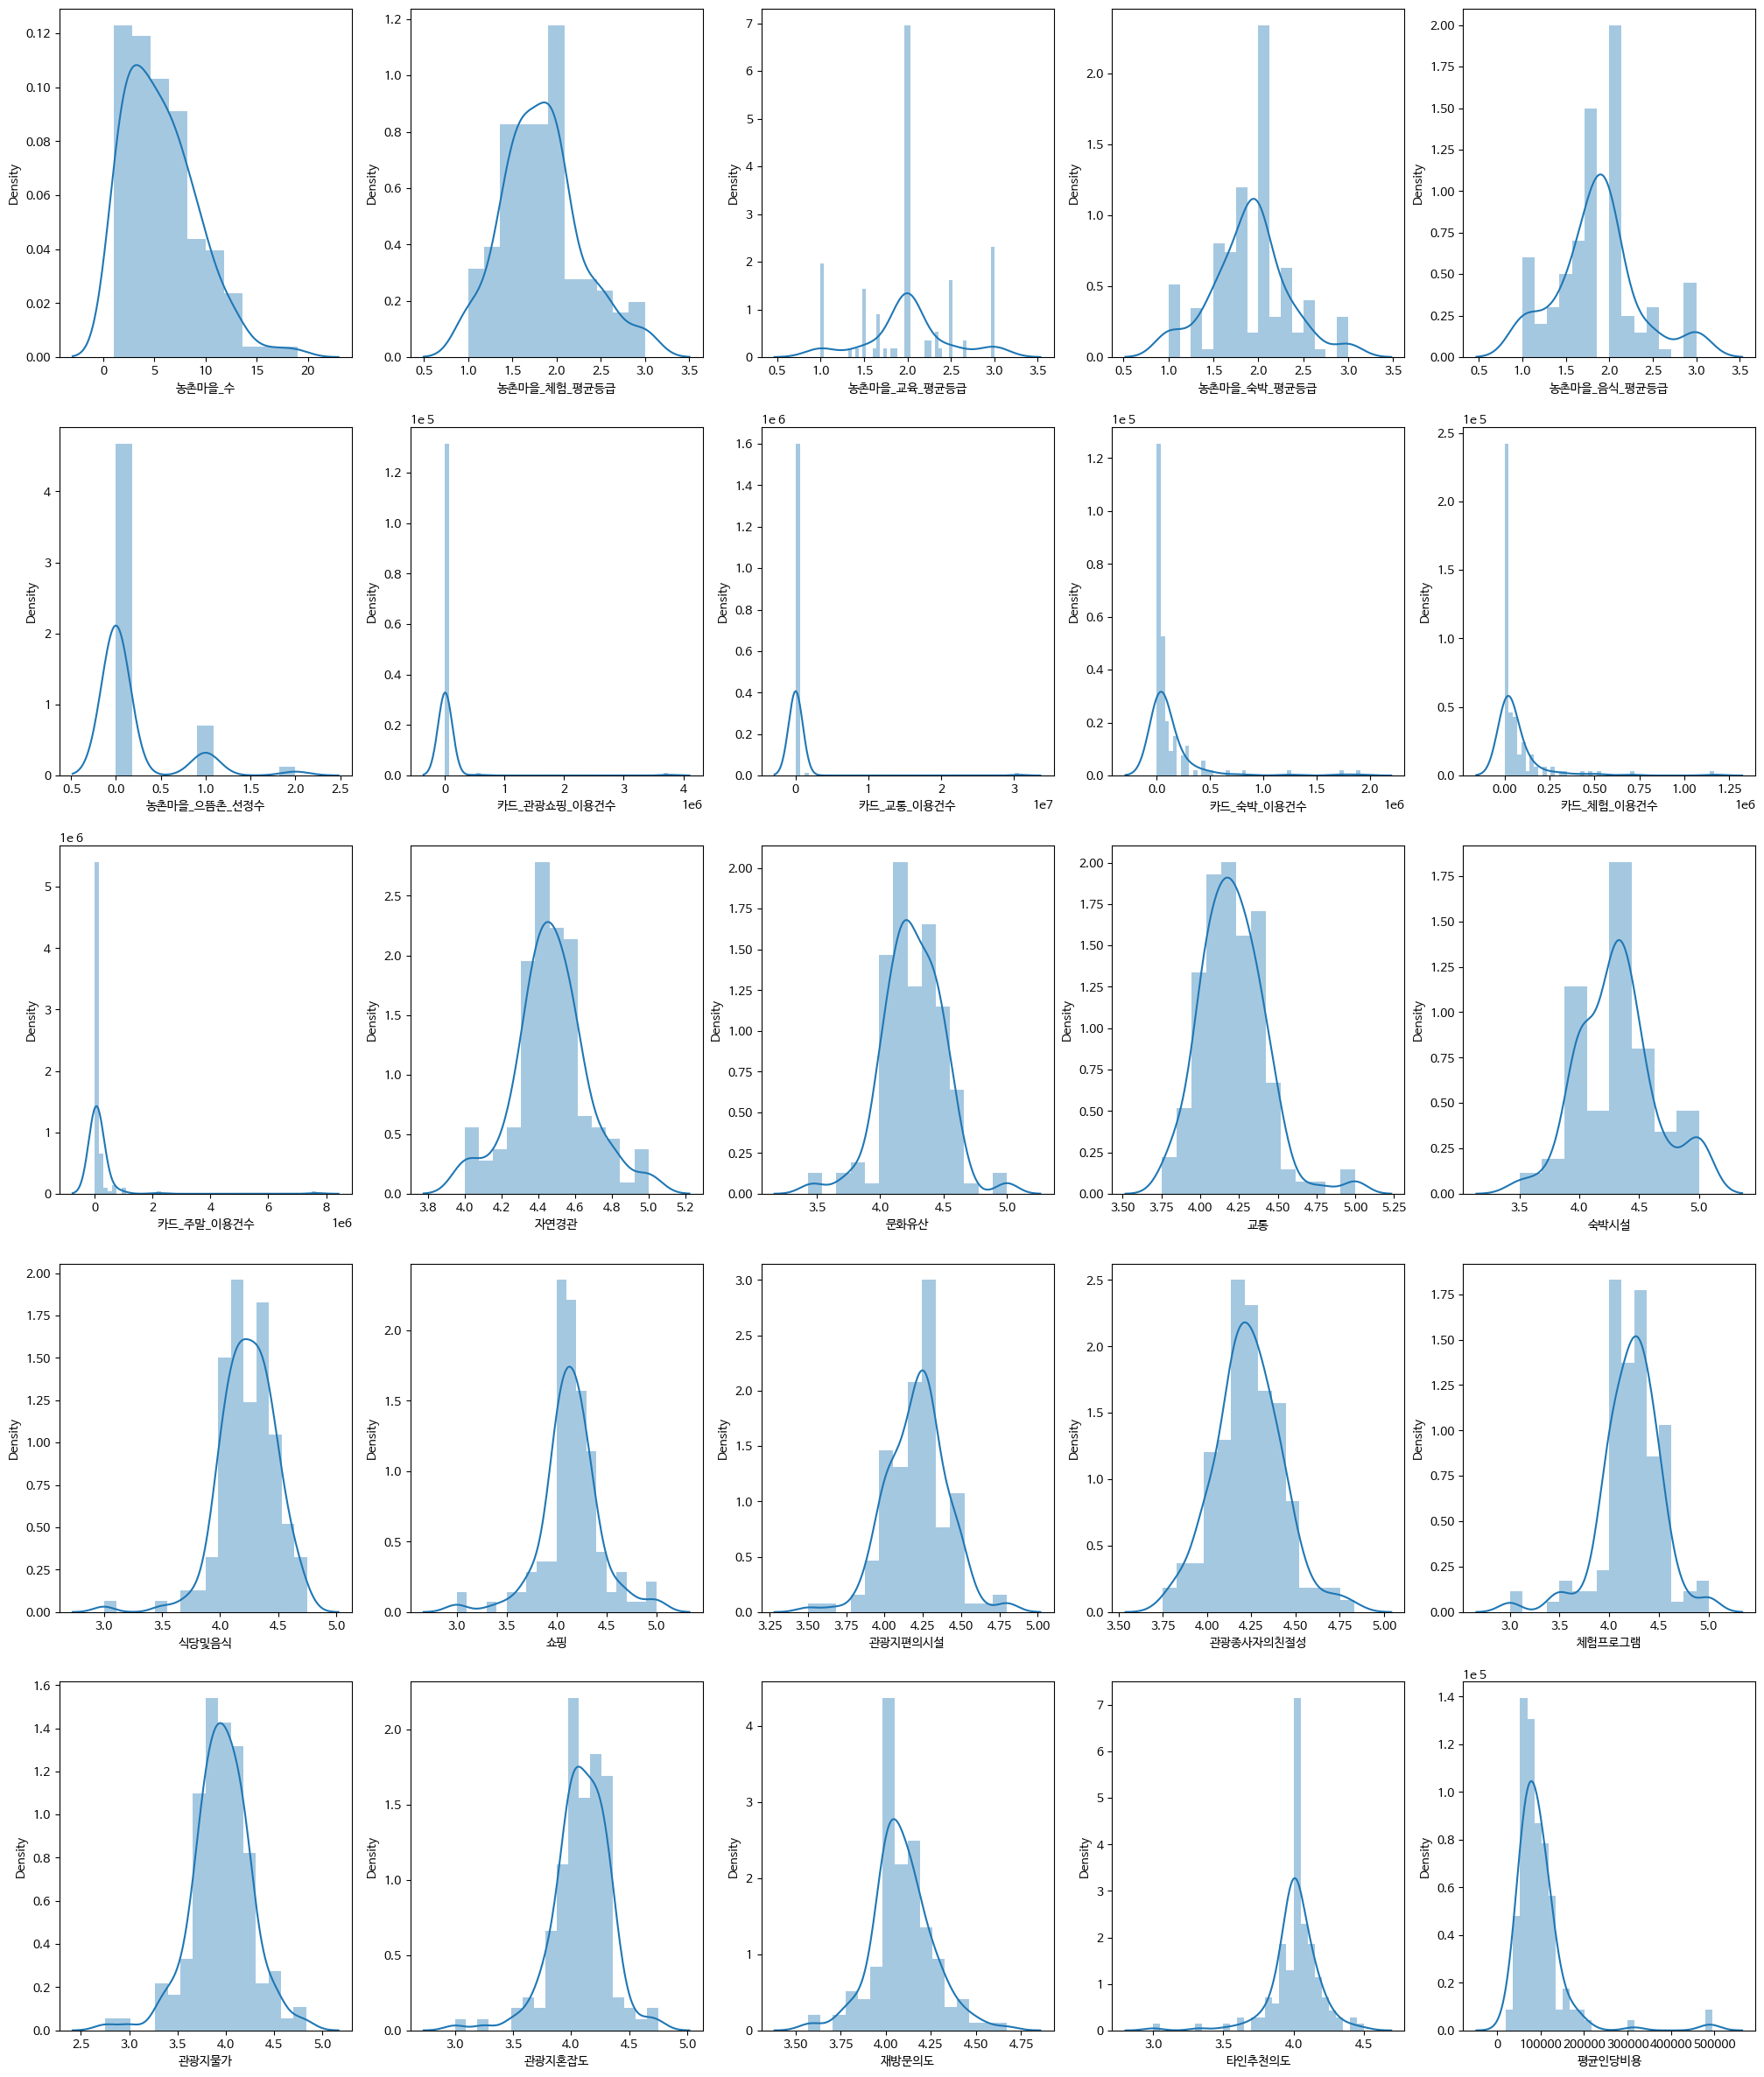

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 30))
columns = df.iloc[:, 1:-1].columns.tolist()

for row in range(6):
    for col in range(5):
      idx = row * 5 + col
      if idx < len(columns):
        ax = axes[row][col]
        sns.distplot(df.iloc[:, idx+1], ax=ax)
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관광지역_시군구      140 non-null    object 
 1   농촌마을_수        140 non-null    int64  
 2   농촌마을_체험_평균등급  140 non-null    float64
 3   농촌마을_교육_평균등급  140 non-null    float64
 4   농촌마을_숙박_평균등급  140 non-null    float64
 5   농촌마을_음식_평균등급  140 non-null    float64
 6   농촌마을_으뜸촌_선정수  140 non-null    int64  
 7   카드_관광쇼핑_이용건수  140 non-null    float64
 8   카드_교통_이용건수    140 non-null    float64
 9   카드_숙박_이용건수    140 non-null    float64
 10  카드_체험_이용건수    140 non-null    float64
 11  카드_주말_이용건수    140 non-null    float64
 12  자연경관          140 non-null    float64
 13  문화유산          140 non-null    float64
 14  교통            140 non-null    float64
 15  숙박시설          140 non-null    float64
 16  식당및음식         140 non-null    float64
 17  쇼핑            140 non-null    float64
 18  관광지편의시설       140 non-null    

#### 편차 큰 컬럼 - 로그변환

In [16]:
# 카드 관련 컬럼 로그변환하기
df_log = df.copy()
df_log.iloc[:, 7:12] = np.log1p(df_log.iloc[:, 7:12])
df_log.iloc[:, -2] = np.log1p(df_log.iloc[:, -2])

#### 로그변환 + 모든변수 표준 scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
df_scaled = df_log.copy()
scaler = StandardScaler()
df_scaled.iloc[:,1:-1] = scaler.fit_transform(df_scaled.iloc[:,1:-1])

In [19]:
df_scaled

,관광지역_시군구,농촌마을_수,농촌마을_체험_평균등급,농촌마을_교육_평균등급,농촌마을_숙박_평균등급,농촌마을_음식_평균등급,농촌마을_으뜸촌_선정수,카드_관광쇼핑_이용건수,카드_교통_이용건수,카드_숙박_이용건수,...,쇼핑,관광지편의시설,관광종사자의친절성,체험프로그램,관광지물가,관광지혼잡도,재방문의도,타인추천의도,평균인당비용,여행객수
0,강원 강릉시,1.769593,-0.936755,0.671656,-0.937047,-0.648068,-0.398673,1.312253,0.948073,1.623976,...,-0.143923,-0.168983,-0.551100,0.273653,-0.689647,-1.206415,0.103267,0.063591,1.396314,1326870.6
1,강원 고성군,-1.029763,0.363572,2.078927,0.232799,0.293321,-0.398673,0.844901,-0.521225,1.688488,...,0.871140,-0.735941,0.301430,1.269641,0.146836,-0.372556,-0.559365,0.691349,1.401371,327955.6
2,강원 동해시,-1.029763,0.363572,-0.030924,-2.106893,-0.079842,-0.398673,0.468610,1.010201,0.574885,...,-0.279265,0.552600,-0.657666,-0.423539,-0.020461,0.711460,-0.559365,-0.335891,0.415265,241207.9
3,강원 삼척시,0.929786,-0.194029,-0.030924,-0.436353,0.293321,-0.398673,0.577438,0.200096,1.351986,...,-1.598847,-0.684399,-0.497817,-0.722336,-1.024240,-0.205784,0.163507,-0.050547,0.918871,233982.5
4,강원 속초시,-1.309699,0.363572,-0.039364,-0.094758,-0.079842,-0.398673,0.880146,1.953118,1.364032,...,0.329773,0.243350,-0.284684,0.240453,-0.723106,-0.414249,-0.017211,-0.050547,1.762207,1391753.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,충북 제천시,0.369915,-0.274324,2.078927,-0.157929,-0.236740,-0.398673,0.815658,-0.088886,0.141979,...,0.532786,-0.014358,0.141581,0.107655,0.447970,0.002680,-0.017211,0.577211,0.565015,405106.8
136,충북 증평군,-0.469892,0.363572,-0.030924,0.232799,-0.412721,-0.398673,-0.409325,0.043613,-1.044820,...,2.901267,0.604142,-1.243780,0.937645,-0.957321,1.003311,-0.559365,-0.050547,1.346358,22090.4
137,충북 진천군,-1.029763,-0.751631,-0.039364,-0.937047,0.293321,-0.398673,-0.167640,-0.272982,-0.084760,...,-1.598847,-1.096732,-1.883178,-0.058343,-0.589269,-0.372556,0.103267,-0.050547,-0.895858,76462.9
138,충북 청주시,-0.189956,0.921174,-0.030924,1.636615,2.413564,-0.398673,0.684022,0.896447,1.201127,...,0.803469,-0.684399,0.780978,0.738447,-0.589269,-0.205784,-0.559365,-0.278822,0.274031,198730.1


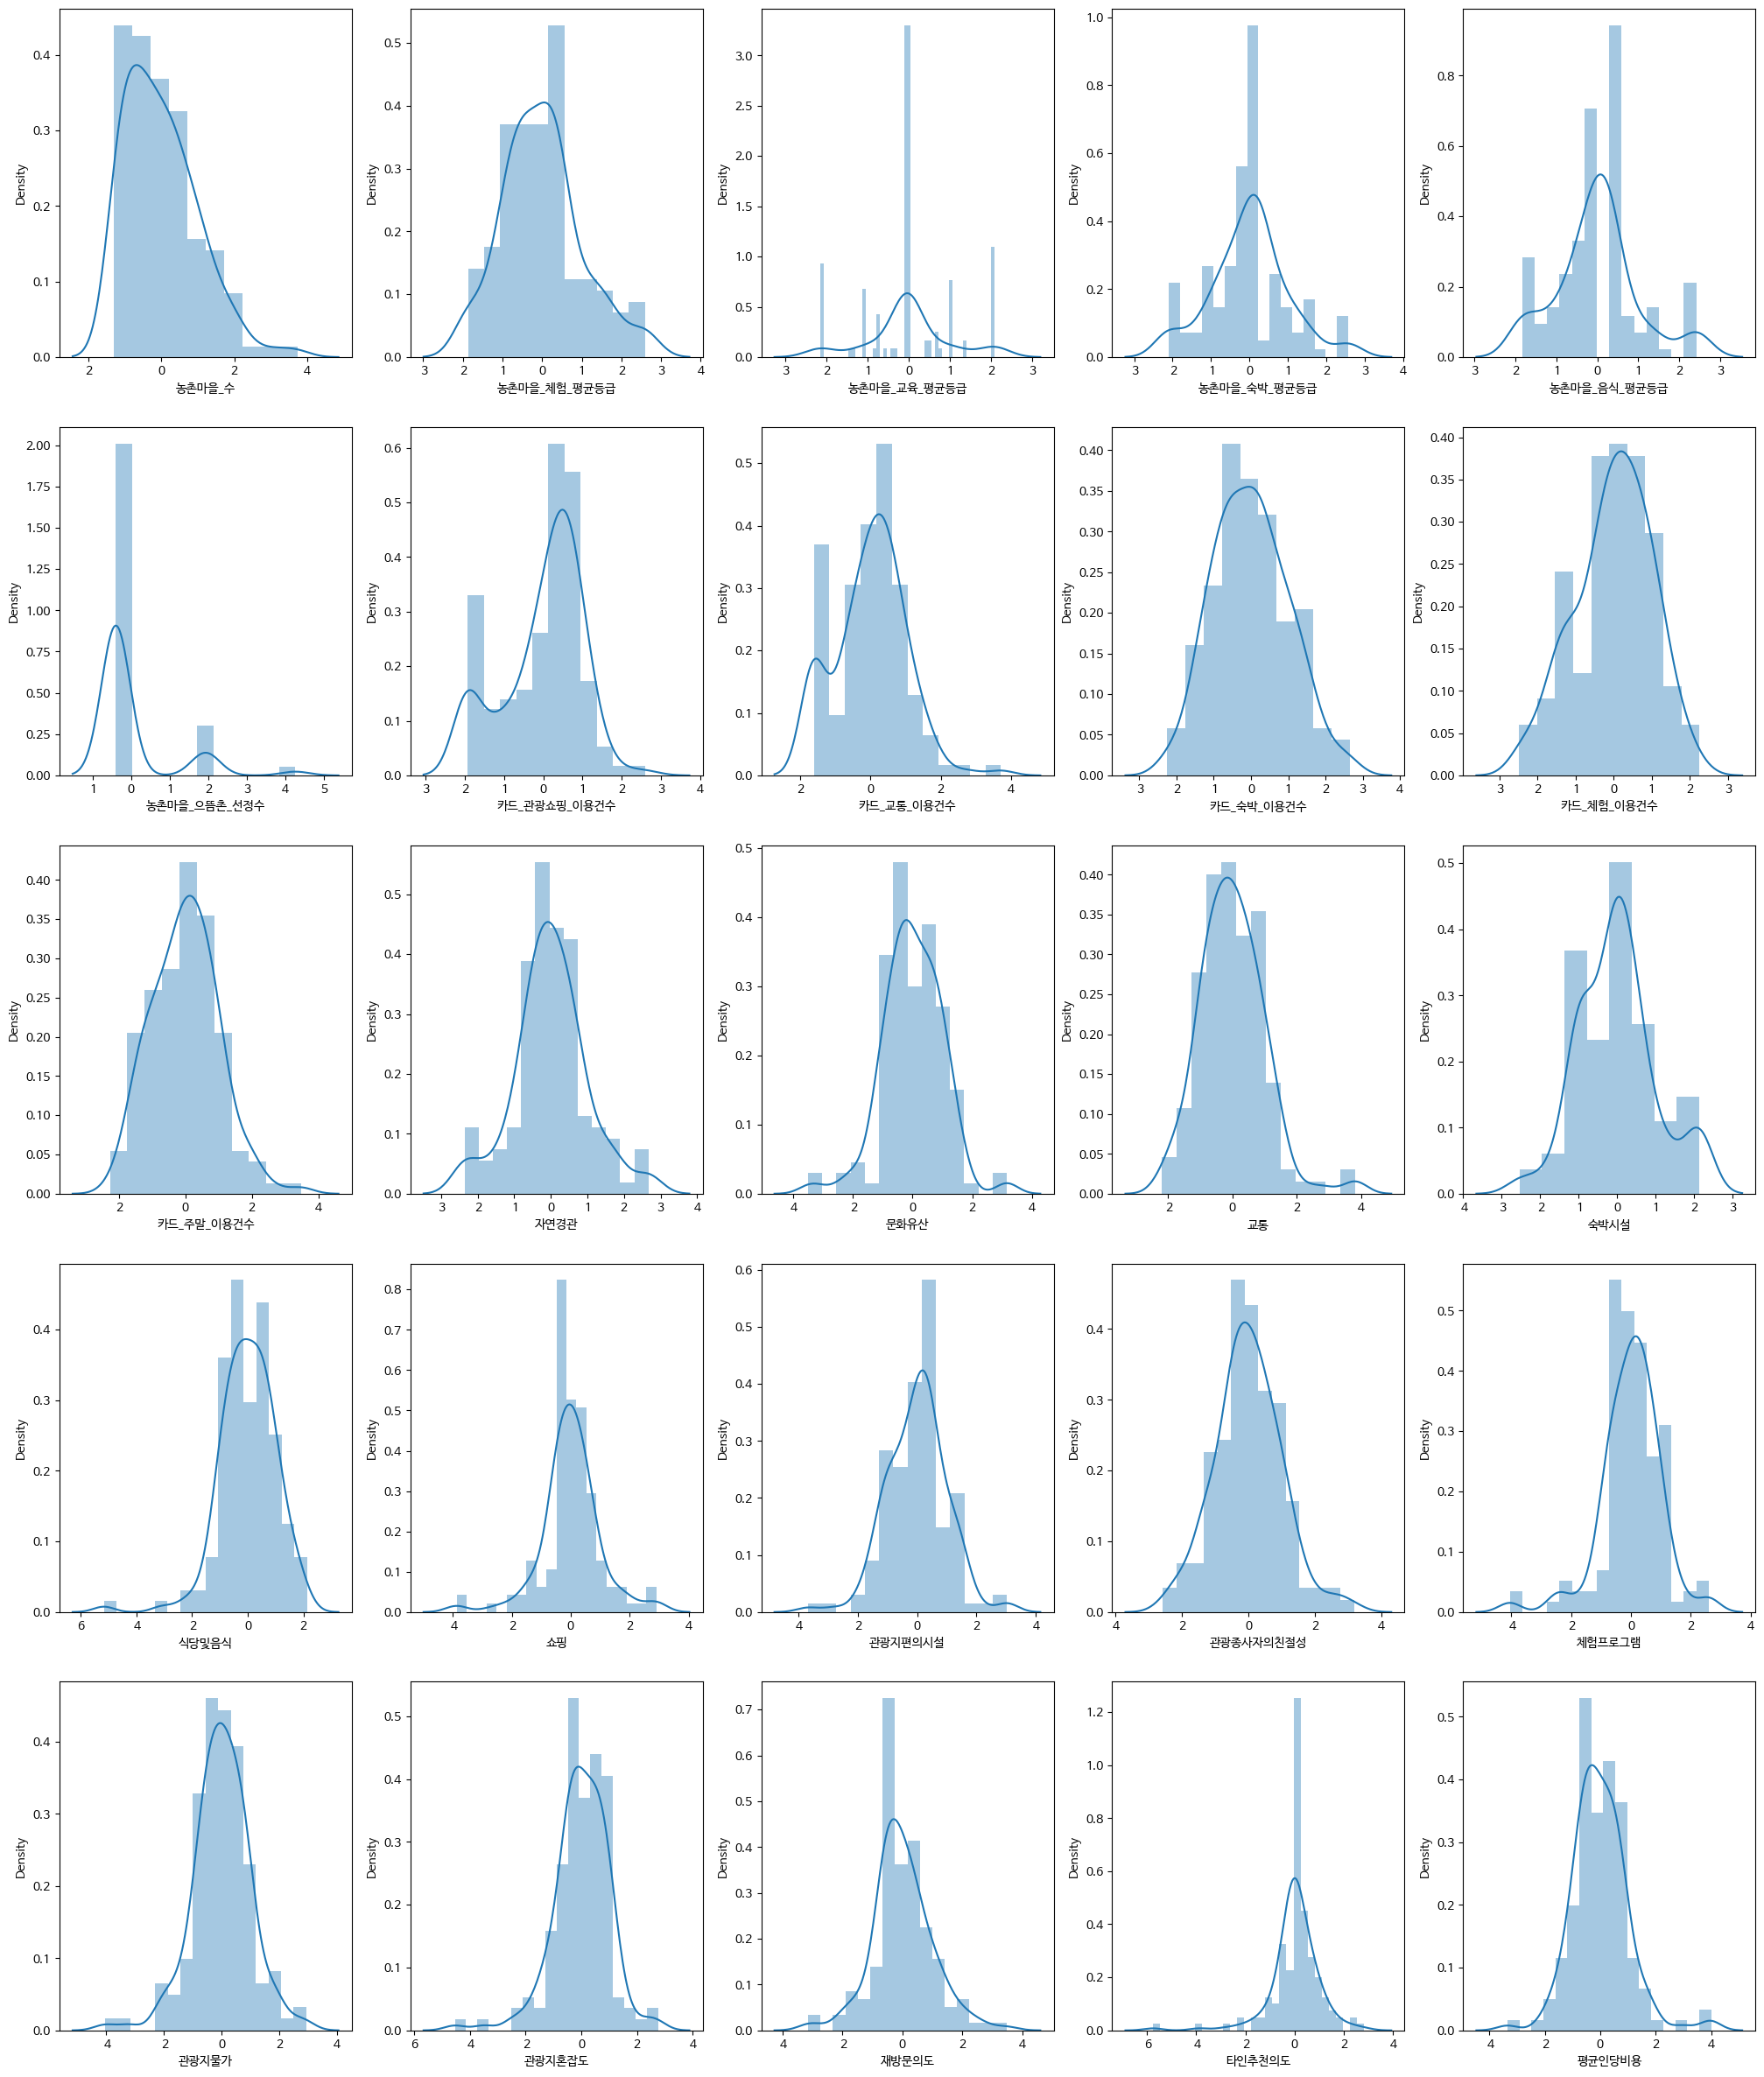

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 30))
columns = df_scaled.iloc[:, 1:-1].columns.tolist()

for row in range(6):
    for col in range(5):
      idx = row * 5 + col
      if idx < len(columns):
        ax = axes[row][col]
        sns.distplot(df_scaled.iloc[:, idx+1], ax=ax)
plt.show()

In [21]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
res = ols('여행객수~' + '+'.join(df_scaled.iloc[:, 1:-1].columns), data=df_scaled.iloc[:, 1:]).fit()        ######
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   여행객수   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     4.642
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           7.31e-09
Time:                        14:31:43   Log-Likelihood:                -1918.7
No. Observations:                 140   AIC:                             3889.
Df Residuals:                     114   BIC:                             3966.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.771e+05   2.03e+04     13.651      0.000    2.37e+05    3.17e+05
농촌마을_수        4.102e+04   2.34e+04      1.753      0.082   -5323.255    8.74e+04
농촌마을_체험_평균등급  1.967e+04    2.6e+04      0.757      0.451   -3.18e+04    7.12e+04
농촌마을_교육_평균등급  4564.2031    2.3e+04      0.198      0.843    -4.1e+04    5.02e+04
농촌마을_숙박_평균등급 -3.086e+04    2.6e+04     -1.186      0.238   -8.24e+04    2.07e+04
농촌마을_음식_평균등급  7812.2821   2.41e+04      0.324      0.747      -4e+04    5.56e+04
농촌마을_으뜸촌_선정수  1.977e+04   2.71e+04      0.729      0.467    -3.4e+04    7.35e+04
카드_관광쇼핑_이용건수  6.338e+04   2.81e+04      2.255      0.026    7711.575    1.19e+05
카드_교통_이용건수    3.635e+04   2.71e+04      1.342      0.182   -1.73e+04       9e+04
카드_숙박_이용건수    5.166e+04    4.1e+04      1.261      0.210   -2.95e+04    1.33e+05
카드_체험_이용건수    5.874e+04   3.69e+04      1.594      0.114   -1.43e+04    1.32e+05
카드_주말_이용건수    8860.5357   5.72e+04      0.155      0.877   -1.05e+05    1.22e+05
자연경관            -6.2605    2.8e+04     -0.000      1.000   -5.54e+04    5.54e+04
문화유산          1.752e+04   2.63e+04      0.667      0.506   -3.45e+04    6.96e+04
교통            6317.7177   2.81e+04      0.225      0.823   -4.94e+04     6.2e+04
숙박시설          3590.1773    2.2e+04      0.163      0.870   -3.99e+04    4.71e+04
식당및음식        -9175.5715   2.92e+04     -0.314      0.754   -6.71e+04    4.87e+04
쇼핑           -1121.6421    2.5e+04     -0.045      0.964   -5.06e+04    4.84e+04
관광지편의시설      -2.022e+04   2.82e+04     -0.717      0.475   -7.61e+04    3.56e+04
관광종사자의친절성    -4.499e+04   2.71e+04     -1.661      0.100   -9.87e+04    8675.344
체험프로그램        2320.8086   2.47e+04      0.094      0.925   -4.67e+04    5.13e+04
관광지물가         7197.9348   3.29e+04      0.219      0.827   -5.79e+04    7.23e+04
관광지혼잡도       -1451.2356   3.08e+04     -0.047      0.963   -6.25e+04    5.96e+04
재방문의도         1.398e+04   2.97e+04      0.470      0.639   -4.49e+04    7.29e+04
타인추천의도        3739.5299   3.15e+04      0.119      0.906   -5.86e+04    6.61e+04
평균인당비용          5.7e+04    2.6e+04      2.191      0.030    5460.931    1.09e+05
==============================================================================
Omnibus:                       29.883   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.178
Skew:                           1.006   Prob(JB):                     7.70e-12
Kurtosis:                       5.174   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_scaled.iloc[:,1:-1].values, i) for i in range(df_scaled.iloc[:,1:-1].shape[1])]
vif['features'] = df_scaled.iloc[:,1:-1].columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.171866,숙박시설
1,1.286084,농촌마을_교육_평균등급
2,1.328471,농촌마을_수
3,1.412605,농촌마을_음식_평균등급
4,1.484443,체험프로그램
5,1.514596,쇼핑
6,1.640025,농촌마을_체험_평균등급
7,1.642091,농촌마을_숙박_평균등급
8,1.643503,평균인당비용
9,1.676573,문화유산


### 단계별 선택법

In [23]:
## 전진 단계별 선택법
import statsmodels.api as sm
variables = df_scaled.columns[1:-1].tolist() ## 설명 변수 리스트

y = df_scaled['여행객수'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0

In [24]:
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서
    ## 선형 모형을 적합한다.
    for col in remainder:
        X = df_scaled[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df_scaled[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df_scaled[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [25]:
selected_variables

['카드_숙박_이용건수', '카드_관광쇼핑_이용건수', '농촌마을_수', '카드_체험_이용건수', '평균인당비용', '관광종사자의친절성']

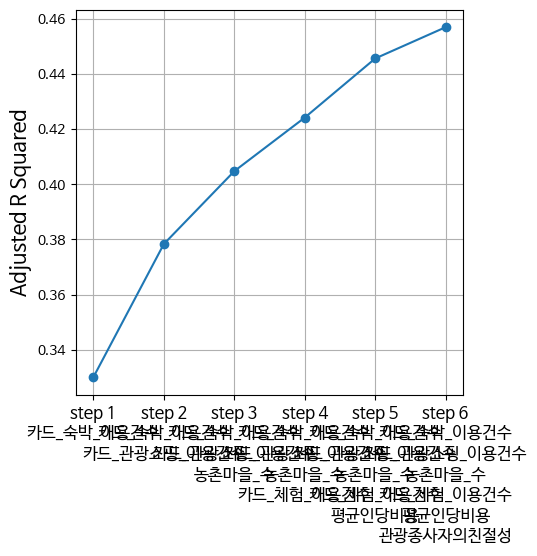

In [26]:
fig = plt.figure(figsize=(5, 5))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')

plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

### 최종으로 회귀분석

In [27]:
selected_variables

['카드_숙박_이용건수', '카드_관광쇼핑_이용건수', '농촌마을_수', '카드_체험_이용건수', '평균인당비용', '관광종사자의친절성']

In [28]:
df_final = df_scaled[selected_variables + ['여행객수']]
df_final

,카드_숙박_이용건수,카드_관광쇼핑_이용건수,농촌마을_수,카드_체험_이용건수,평균인당비용,관광종사자의친절성,여행객수
0,1.623976,1.312253,1.769593,0.926650,1.396314,-0.551100,1326870.6
1,1.688488,0.844901,-1.029763,-1.037077,1.401371,0.301430,327955.6
2,0.574885,0.468610,-1.029763,-1.139460,0.415265,-0.657666,241207.9
3,1.351986,0.577438,0.929786,-0.636188,0.918871,-0.497817,233982.5
4,1.364032,0.880146,-1.309699,1.164243,1.762207,-0.284684,1391753.4
...,...,...,...,...,...,...,...
135,0.141979,0.815658,0.369915,1.396681,0.565015,0.141581,405106.8
136,-1.044820,-0.409325,-0.469892,0.820439,1.346358,-1.243780,22090.4
137,-0.084760,-0.167640,-1.029763,-1.337067,-0.895858,-1.883178,76462.9
138,1.201127,0.684022,-0.189956,0.729752,0.274031,0.780978,198730.1


In [29]:
res = ols('여행객수~' + '+'.join(df_final.iloc[:, :-1].columns), data=df_final).fit()        ######
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   여행객수   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     20.49
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           6.86e-17
Time:                        14:31:44   Log-Likelihood:                -1922.1
No. Observations:                 140   AIC:                             3858.
Df Residuals:                     133   BIC:                             3879.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.771e+05   1.92e+04     14.398      0.000    2.39e+05    3.15e+05
카드_숙박_이용건수    6.898e+04   2.82e+04      2.442      0.016    1.31e+04    1.25e+05
카드_관광쇼핑_이용건수  6.535e+04   2.45e+04      2.672      0.008     1.7e+04    1.14e+05
농촌마을_수        4.977e+04   1.95e+04      2.549      0.012    1.12e+04    8.84e+04
카드_체험_이용건수     6.46e+04   2.39e+04      2.708      0.008    1.74e+04    1.12e+05
평균인당비용         6.21e+04    2.3e+04      2.697      0.008    1.66e+04    1.08e+05
관광종사자의친절성    -3.792e+04   1.95e+04     -1.949      0.053   -7.64e+04     566.611
==============================================================================
Omnibus:                       38.798   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.395
Skew:                           1.201   Prob(JB):                     5.75e-18
Kurtosis:                       5.800   Cond. No.                         2.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
selected_variables.sort()
selected_variables

['관광종사자의친절성', '농촌마을_수', '카드_관광쇼핑_이용건수', '카드_숙박_이용건수', '카드_체험_이용건수', '평균인당비용']